In [43]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
PATH = "./data/"

In [3]:
os.listdir(PATH)

['PET_PRI_GND_DCUS_NUS_W.csv',
 'Review.csv',
 'vehicles.csv',
 'data_links.txt',
 'tn_mvr_2018-2022.csv',
 'used_car_sales.csv',
 'vehicles_processed.csv']

In [80]:
pd.read_csv(PATH + "PET_PRI_GND_DCUS_NUS_W.csv", nrows=1).columns

Index(['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1',
       'P2', 'P3', 'D1'],
      dtype='object')

## Processing *vehicles.csv*

In [ ]:
df_cars = pd.read_csv(PATH + "vehicles.csv")
df_cars.head()

In [41]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df_cars.describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


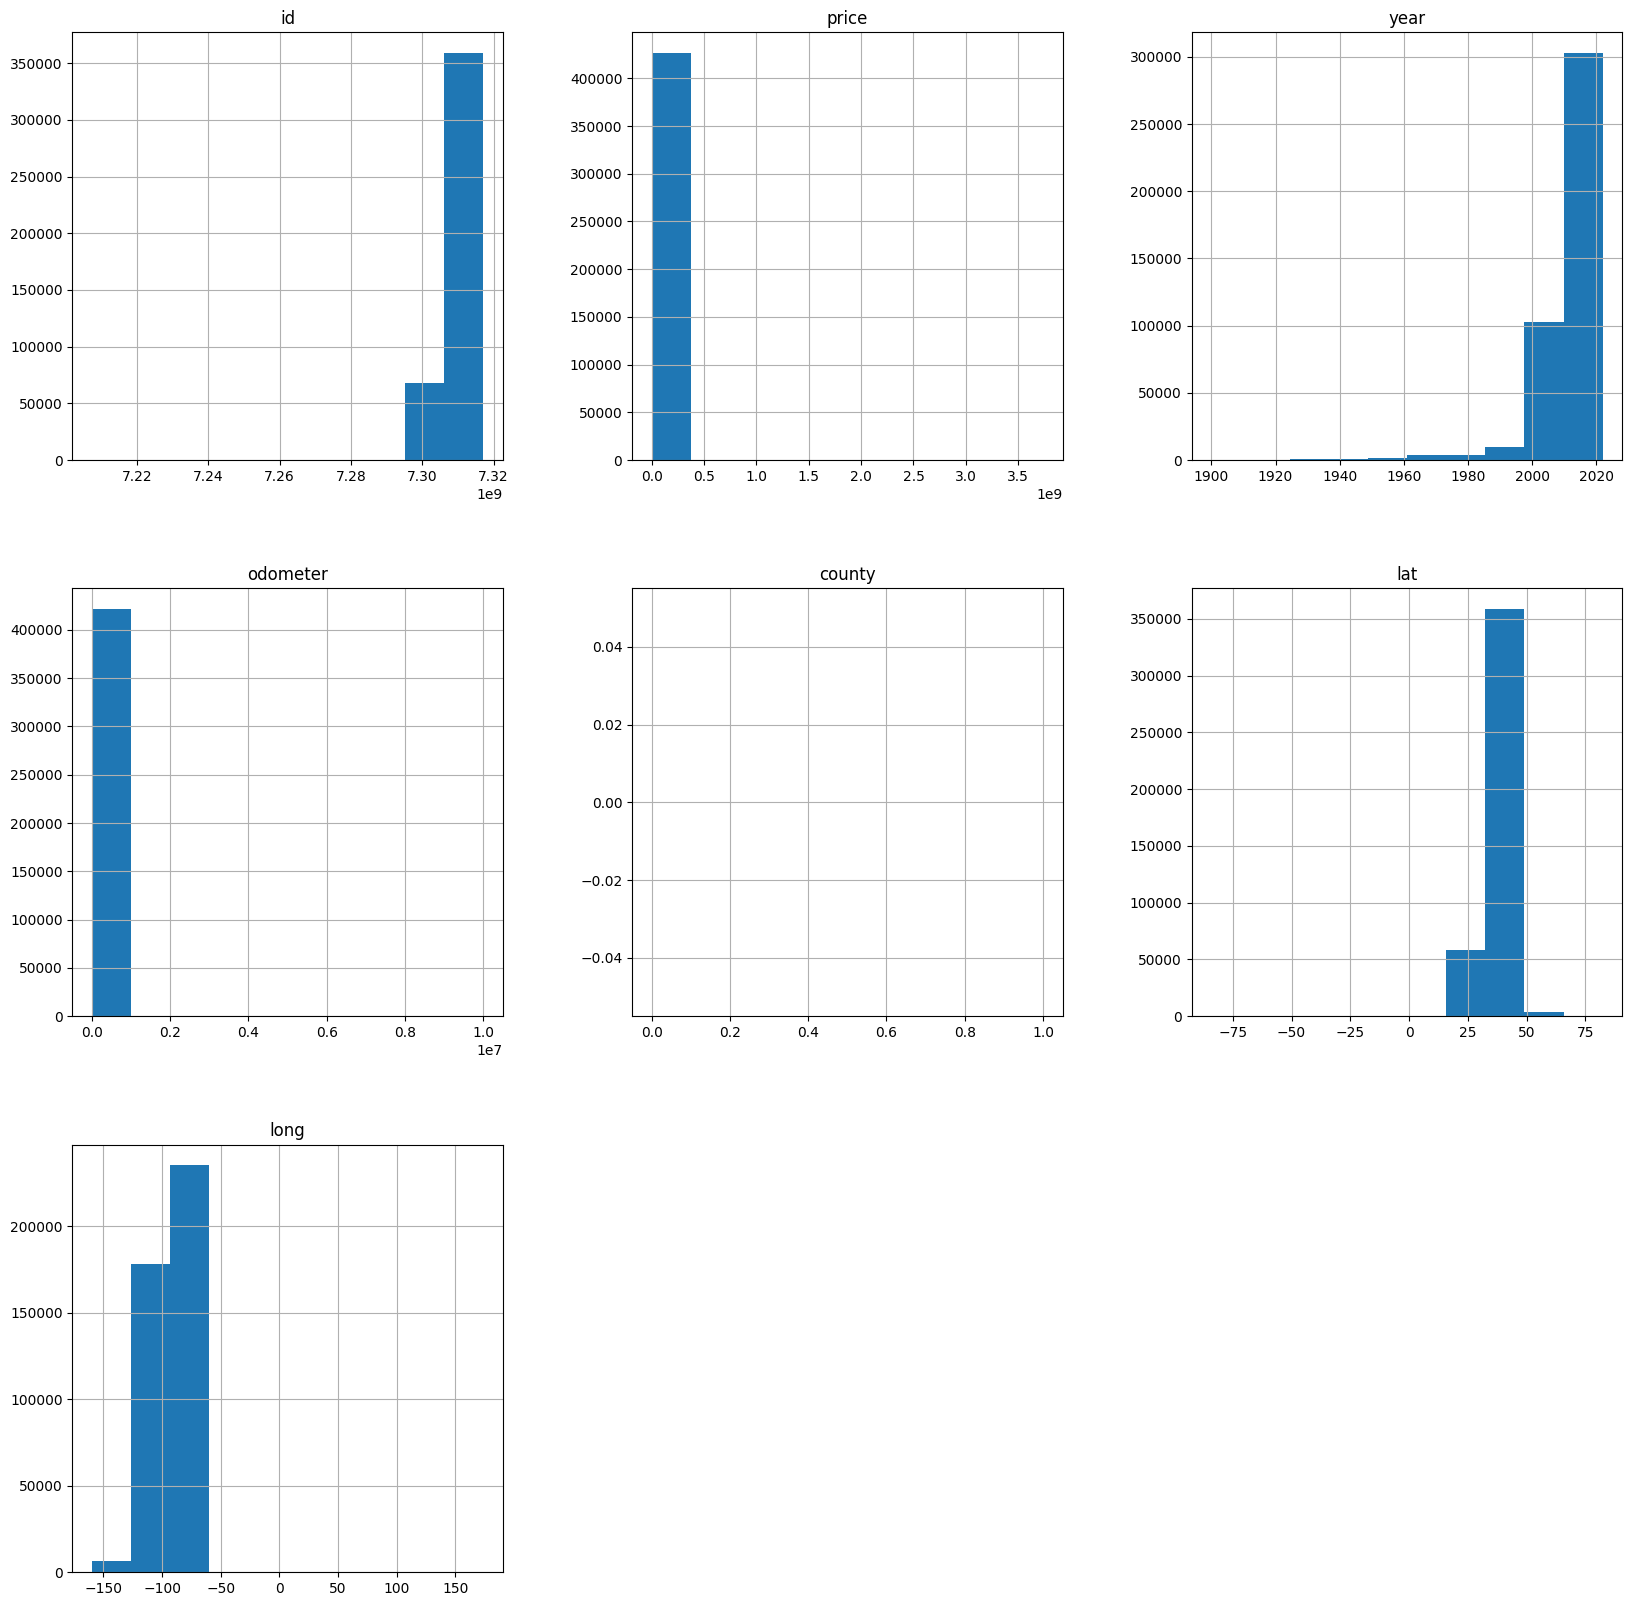

In [8]:
df_cars.hist(figsize=(20,20));

We can see that county as only *NULL* elements, therefore it will be removed

In [40]:
df_cars.drop(columns=["county"], inplace=True)

In [42]:
df_cars.image_url

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
426875    https://images.craigslist.org/00o0o_iiraFnHg8q...
426876    https://images.craigslist.org/00x0x_15sbgnxCIS...
426877    https://images.craigslist.org/00L0L_farM7bxnxR...
426878    https://images.craigslist.org/00z0z_bKnIVGLkDT...
426879    https://images.craigslist.org/00Y0Y_lEUocjyRxa...
Name: image_url, Length: 426880, dtype: object

*url* column is a link to the website where the sale was taking place. <br> 
For what we have tried, the links takes us to non-existing sites, since the car as already been sold. <br>
The *image_url* links to the correspondent images, which do not exist to.<br>
Therefore we will take them out

In [43]:
df_cars.drop(columns=["url", "image_url"], inplace=True)

The posting date columns is not formatted as a datetime

In [48]:
df_cars.posting_date = pd.to_datetime(df_cars.posting_date)

In [88]:
df_cars.tail()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
426875,7301591192,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,...,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04 03:21:31-06:00
426876,7301591187,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,...,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04 03:21:29-06:00
426877,7301591147,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,...,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04 03:21:17-06:00
426878,7301591140,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,...,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04 03:21:11-06:00
426879,7301591129,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,...,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04 03:21:07-06:00


We can see that we have some sales do not have an associated dates. <br>
we will remove those rows, since we need that information for our analysis, later on

In [56]:
df_cars = df_cars[~df_cars.posting_date.isna()]

We also need manufacturer/model so that we can link this data with other sources in the car dimension

In [59]:
df_cars = df_cars[~df_cars.manufacturer.isna()]

In [60]:
df_cars = df_cars[~df_cars.model.isna()]

In [61]:
df_cars.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404026 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404026 non-null  int64  
 1   region        404026 non-null  object 
 2   region_url    404026 non-null  object 
 3   price         404026 non-null  int64  
 4   year          404020 non-null  float64
 5   manufacturer  404026 non-null  object 
 6   model         404026 non-null  object 
 7   condition     239678 non-null  object 
 8   cylinders     237075 non-null  object 
 9   fuel          401473 non-null  object 
 10  odometer      399889 non-null  float64
 11  title_status  396308 non-null  object 
 12  transmission  401755 non-null  object 
 13  VIN           256464 non-null  object 
 14  drive         283106 non-null  object 
 15  size          113476 non-null  object 
 16  type          319954 non-null  object 
 17  paint_color   282803 non-null  object 
 18  des

In [4]:
df_cars = pd.read_csv(PATH + "vehicles_processed.csv", index_col=0)

In [28]:
df_cars.region.unique().shape

(404,)

<Axes: xlabel='Regions', ylabel='Counts'>

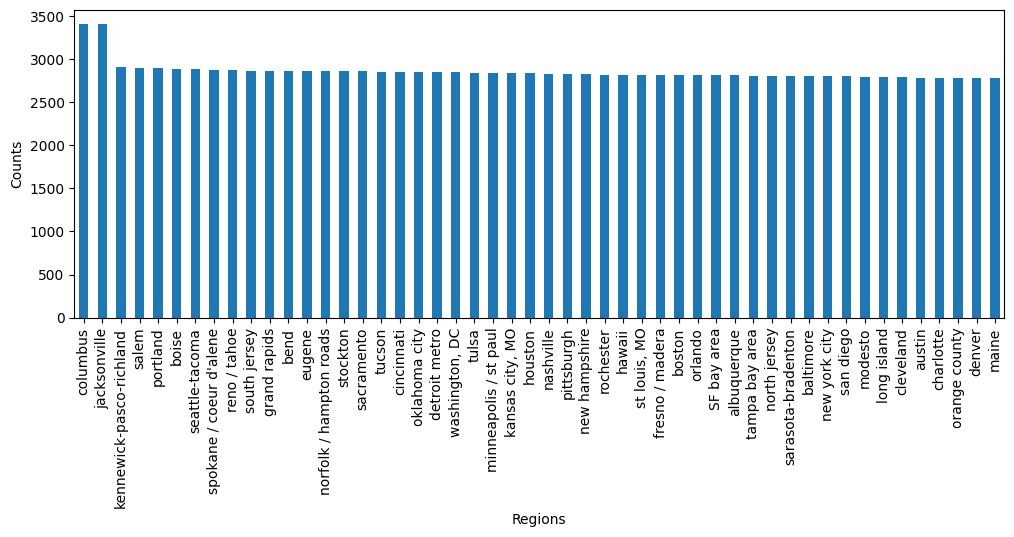

In [59]:
df_cars.region.value_counts().nlargest(50).plot(
    kind="bar", 
    figsize=(12,4),
    ylabel="Counts",
    xlabel="Regions"
)

It seems there are large amounts of car sale for different regions

<Axes: xlabel='year', ylabel='Counts'>

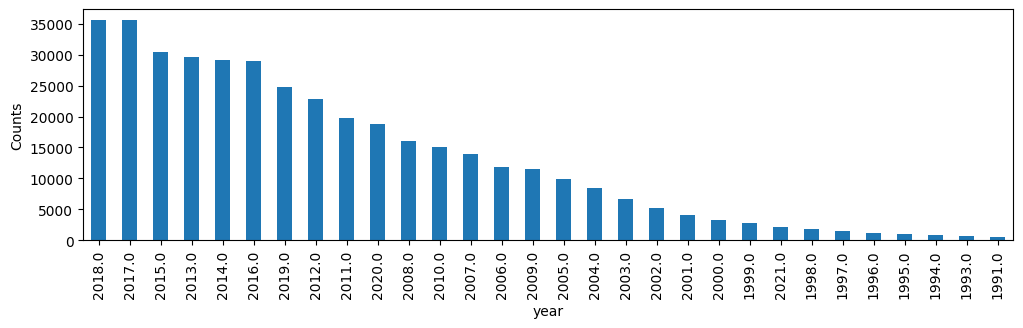

In [60]:
df_cars.year.value_counts().nlargest(30).plot(
    kind="bar", 
    figsize=(12,3),
    xlabel="year",
    ylabel="Counts"
)

Most of the selled cars are from recent years

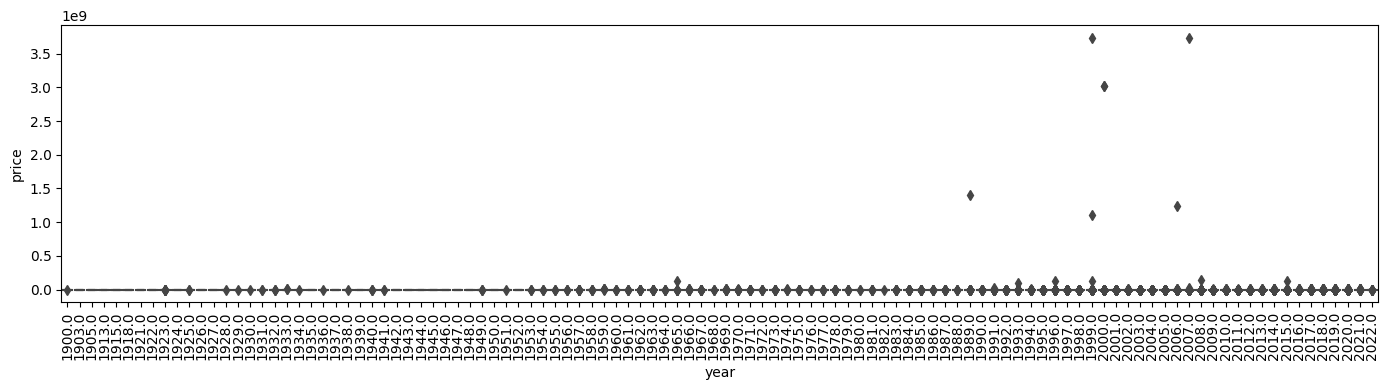

In [87]:
f,ax=plt.subplots(1,1,figsize=(14,4))
sns.boxplot(df_cars, x="year", y="price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
f.tight_layout()

<Axes: xlabel='Manufacturer', ylabel='Counts'>

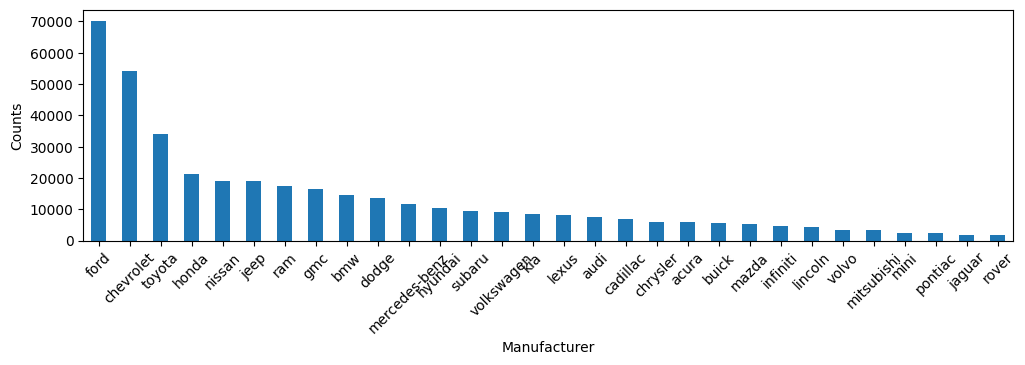

In [86]:
df_cars.manufacturer.value_counts().nlargest(30).plot(
    kind="bar", 
    figsize=(12,3),
    xlabel="Manufacturer",
    ylabel="Counts",
    rot=45
)

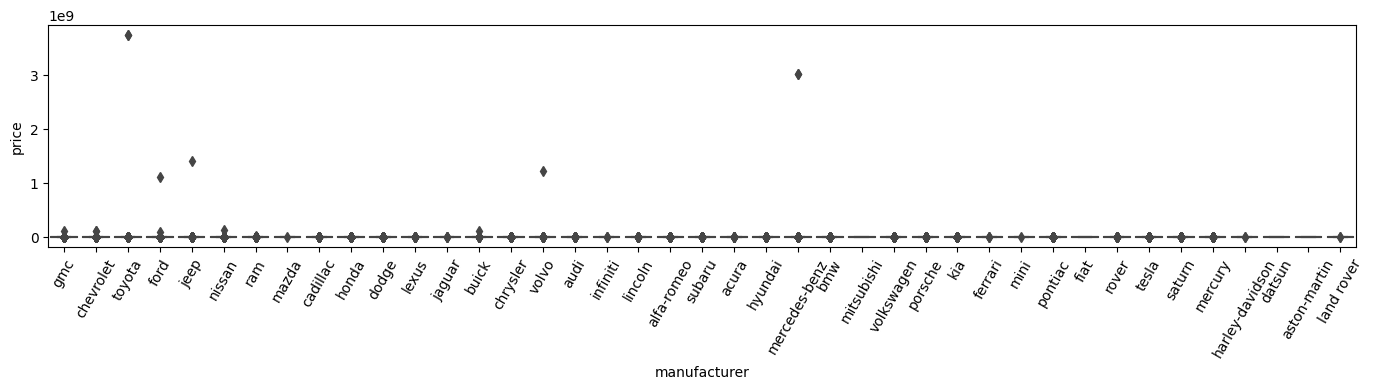

In [85]:
f,ax=plt.subplots(1,1,figsize=(14,4))
sns.boxplot(df_cars, x="manufacturer", y="price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [64]:
df_cars.model.unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'cj 3a willys', 'rx& gls sport',
       'gand wagoneer'], dtype=object)

<Axes: xlabel='condition', ylabel='price'>

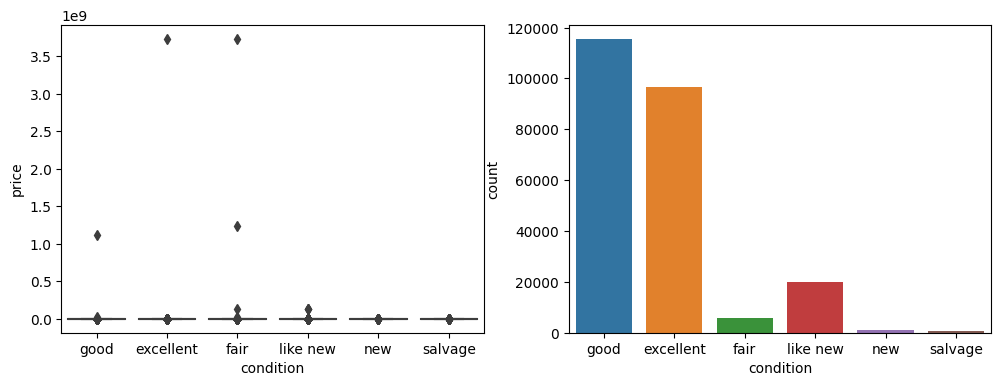

In [66]:
f, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(df_cars, x="condition", ax=ax[1])
sns.boxplot(df_cars, x="condition", y="price", ax=ax[0])

In [67]:
df_cars.cylinders.unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

<Axes: xlabel='fuel', ylabel='count'>

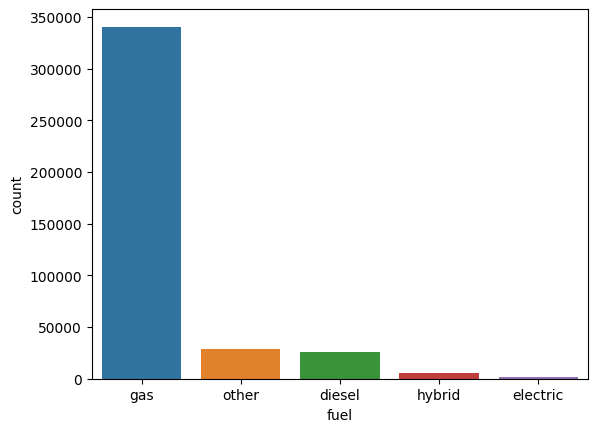

In [71]:
sns.countplot(df_cars, x="fuel")

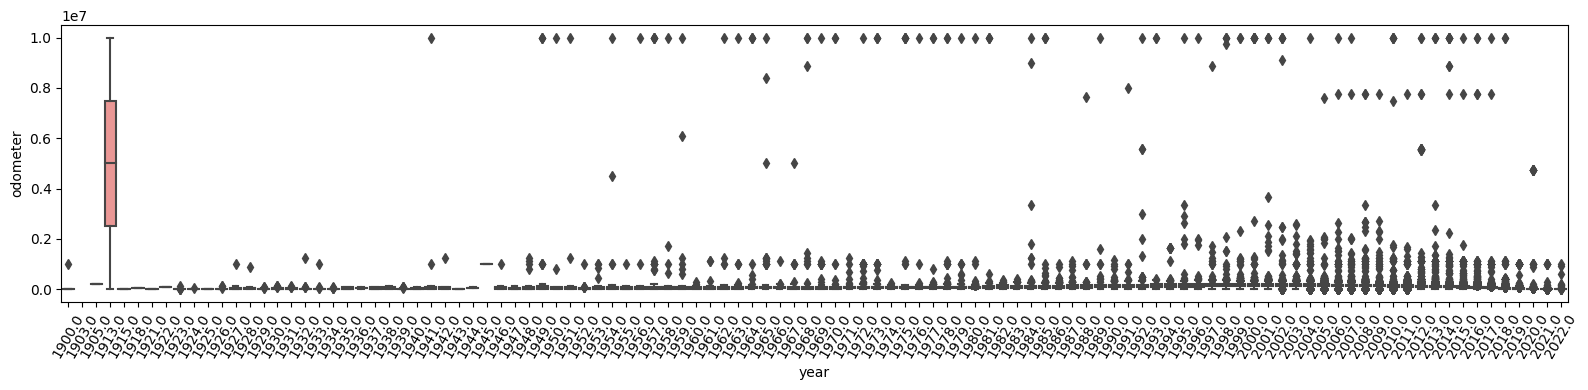

In [83]:
f, ax = plt.subplots(1,1,figsize=(16,4))
sns.boxplot(df_cars, x="year", y="odometer", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [89]:
df_cars.title_status.value_counts()

clean         383814
rebuilt         6849
salvage         3630
lien            1319
missing          558
parts only       138
Name: title_status, dtype: int64

In [92]:
df_cars.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [94]:
df_cars.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [98]:
df_cars["size"].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

<Axes: >

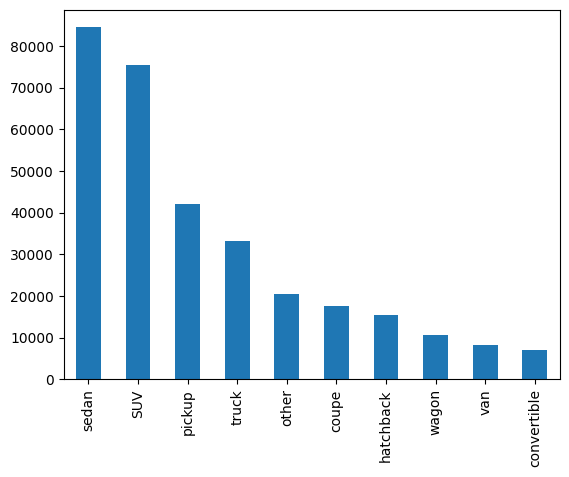

In [103]:
df_cars["type"].value_counts().nlargest(10).plot(kind="bar")

In [105]:
df_cars.paint_color.unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [108]:
df_cars.description.unique().shape

(343151,)

<Axes: >

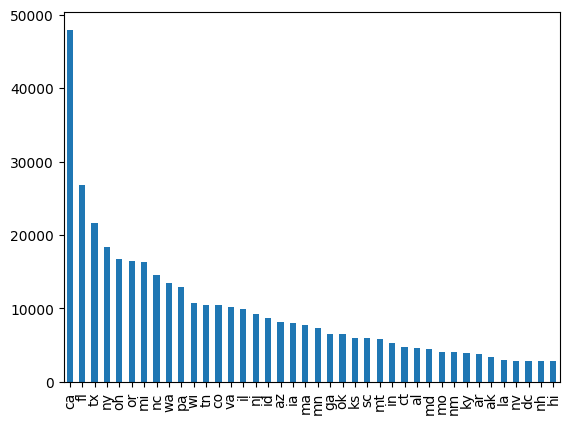

In [113]:
df_cars.state.value_counts().nlargest(40).plot(kind="bar")

In [6]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404026 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404026 non-null  int64  
 1   region        404026 non-null  object 
 2   region_url    404026 non-null  object 
 3   price         404026 non-null  int64  
 4   year          404020 non-null  float64
 5   manufacturer  404026 non-null  object 
 6   model         404026 non-null  object 
 7   condition     239678 non-null  object 
 8   cylinders     237075 non-null  object 
 9   fuel          401473 non-null  object 
 10  odometer      399889 non-null  float64
 11  title_status  396308 non-null  object 
 12  transmission  401755 non-null  object 
 13  VIN           256464 non-null  object 
 14  drive         283106 non-null  object 
 15  size          113476 non-null  object 
 16  type          319954 non-null  object 
 17  paint_color   282803 non-null  object 
 18  des

In [175]:
df_cars.type

27           pickup
28           pickup
29           pickup
30           pickup
31            truck
            ...    
426875        sedan
426876        sedan
426877    hatchback
426878        sedan
426879        coupe
Name: type, Length: 404026, dtype: object

In [106]:
df_cars.isna().sum()[df_cars.isna().sum()>0]

year                 6
condition       164348
cylinders       166951
fuel              2553
odometer          4137
title_status      7718
transmission      2271
VIN             147562
drive           120920
size            290550
type             84072
paint_color     121223
description          2
lat               6155
long              6155
dtype: int64

In [66]:
df_cars.to_csv(PATH + "vehicles_processed.csv")

## Processing *used_car_sales.csv*

In [156]:
df_used_cars = pd.read_csv(PATH + "used_car_sales.csv")
df_used_cars.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD,2020-11-23
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,2019-09-30
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,2020-12-23
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,2019-06-30
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,2019-09-25


In [157]:
df_used_cars.describe(include="all")

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
count,122144.000000,122144.000000,122144.000000,121235,1.221440e+05,122144,121571,1.221440e+05,73220,95046,101358,1.221440e+05,97293,122144
unique,NaN,NaN,NaN,15482,NaN,464,4289,NaN,24981,22399,2329,NaN,2814,1083
top,NaN,NaN,NaN,92868,NaN,Ford,Mustang,NaN,XLT,350,Sedan,NaN,RWD,2019-02-15
freq,NaN,NaN,NaN,3663,NaN,22027,4478,NaN,1477,2085,18216,NaN,42207,254
mean,85094.212397,10808.560715,2019.375467,NaN,1.404291e+06,NaN,NaN,3.959362e+03,NaN,NaN,NaN,1.758655e+04,NaN,NaN
std,47786.970812,13987.295760,0.503671,NaN,3.335593e+07,NaN,NaN,1.984514e+05,NaN,NaN,NaN,6.144603e+06,NaN,NaN
min,1.000000,0.000000,2018.000000,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,44547.250000,2950.000000,2019.000000,NaN,4.479225e+04,NaN,NaN,1.977000e+03,NaN,NaN,NaN,4.000000e+00,NaN,NaN
50%,85555.500000,6500.000000,2019.000000,NaN,9.000000e+04,NaN,NaN,2.000000e+03,NaN,NaN,NaN,6.000000e+00,NaN,NaN
75%,127078.500000,13800.000000,2020.000000,NaN,1.402000e+05,NaN,NaN,2.008000e+03,NaN,NaN,NaN,8.000000e+00,NaN,NaN


In [158]:
df_used_cars.isna().sum()[df_used_cars.isna().sum()>0]

zipcode        909
Model          573
Trim         48924
Engine       27098
BodyType     20786
DriveType    24851
dtype: int64

In [159]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
 13  datesold      122144 non-null  object
dtypes: int64(6), object(8)
memory usage: 13.0+ MB


<Axes: >

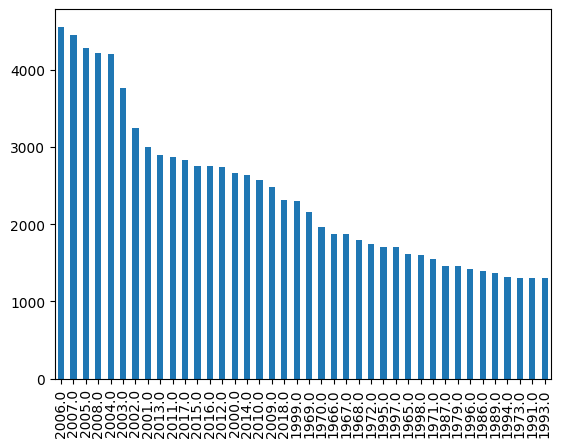

In [263]:
df_used_cars.Year.value_counts().nlargest(40).plot(kind="bar")

In this dataset of used cars, the cars that were most sold had already some few years. <br>
Probably the ones that are cheapest and have some economic features

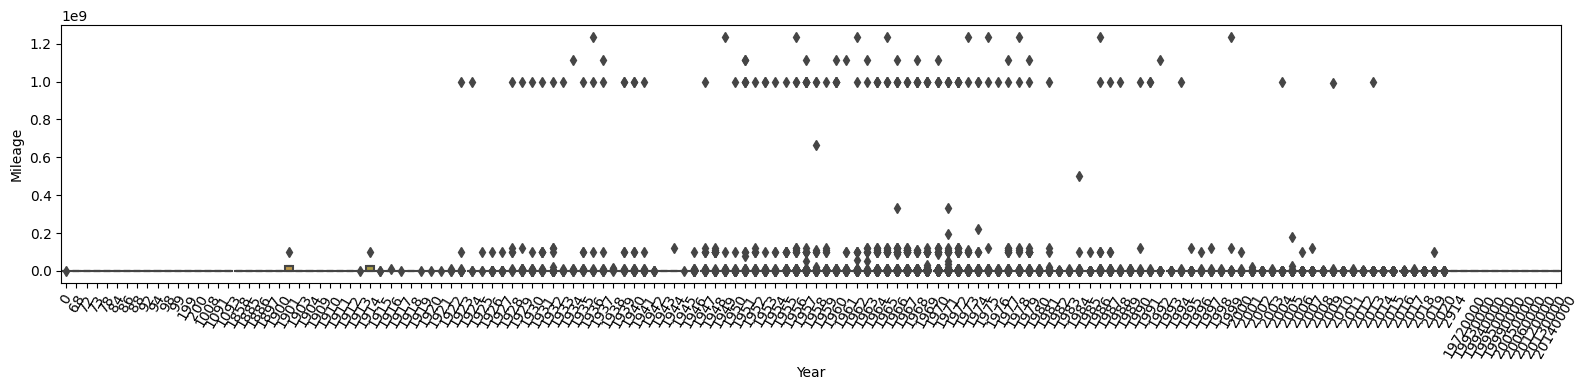

In [160]:
f, ax = plt.subplots(1,1,figsize=(16,4))
sns.boxplot(df_used_cars, x="Year", y="Mileage", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [161]:
df_used_cars.Year[df_used_cars.Year>9999]

10121     20130000
10122     20140000
19485     20140000
45307     19720000
80343     19940000
80793     19950000
80794     20120000
91326     20060000
91327     20120000
91691     19930000
117571    20050000
121621    19990000
Name: Year, dtype: int64

There are car years that are wrongly with 4 padded 0's that need to be removed

In [162]:
df_used_cars.Year = df_used_cars.Year.apply(lambda x: x if x < 9999 else x/10000)

In [163]:
df_used_cars.Year[df_used_cars.Year>9999]

Series([], Name: Year, dtype: float64)

In [168]:
df_used_cars.Trim.value_counts()

XLT                                                 1477
SE                                                  1096
LT                                                   956
--                                                   854
Limited                                              814
                                                    ... 
C15, Sierra 1500 Classic, C10 Pickups, Hot Rods,       1
ZR2, SUV                                               1
K10, c10, silverado 2500, other pickups                1
4X4 K10 SILVERADO C/K PICKUP 2500, C10, C20, K20       1
Custom Sport Special                                   1
Name: Trim, Length: 24981, dtype: int64

In [170]:
df_used_cars.Engine.value_counts()

350                                                       2085
V8                                                        1894
V6                                                         929
5.0                                                        612
5.7                                                        590
                                                          ... 
4.7 Liter Magnum V8                                          1
1.6 L/6 Valves                                               1
5.9 liter 360 V8                                             1
1.8L 1798CC 110Cu. In. l4 GAS DOHC Naturally Aspirated       1
M52TU 2.8L                                                   1
Name: Engine, Length: 22399, dtype: int64

In [172]:
df_used_cars.BodyType.value_counts()

Sedan                                  18216
Coupe                                  18046
SUV                                    15353
Convertible                            12327
Standard Cab Pickup                     4289
                                       ...  
Tractor Truck - Medium Conventional        1
Sub                                        1
SPORTS VAN                                 1
CONVENTIONAL CAB                           1
Travelall                                  1
Name: BodyType, Length: 2329, dtype: int64

In [173]:
df_used_cars.BodyType.isna().sum()

20786

In [178]:
df_used_cars.NumCylinders.value_counts()

8             43530
0             29981
6             27427
4             18643
5              1005
10              604
12              592
3               181
2               148
1                23
9                 3
350               2
16                1
118               1
2147483647        1
440               1
123               1
Name: NumCylinders, dtype: int64

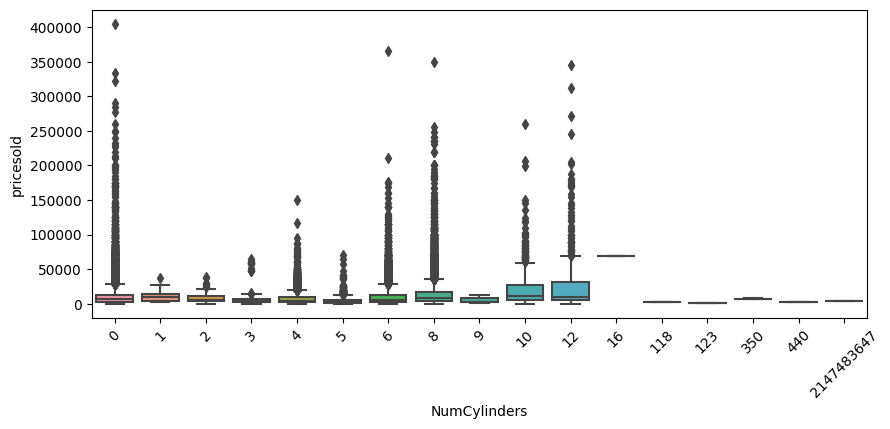

In [186]:
f, ax = plt.subplots(1,1,figsize=(10,4))
sns.boxplot(df_used_cars, x="NumCylinders", y="pricesold", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [226]:
df_used_cars[df_used_cars.NumCylinders==2147483647]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold


In [204]:
df_used_cars[ (df_used_cars.Make=="Ford") & (df_used_cars.Model=="E-Series Van") & (df_used_cars.Engine=="302")]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
31071,27220,2840,2019,99205,69000,Ford,E-Series Van,1973.0,NaN,302,NaN,8,4WD,2019-02-14
40400,98260,650,2019,97429,186464,Ford,E-Series Van,1986.0,BASIC,302,Standard Passenger Van,8,RWD,2019-02-10
50026,71848,10000,2020,34698,2000,Ford,E-Series Van,1970.0,E-100,302,Van,8,RWD,2020-04-06
52749,82216,8300,2019,08065,104022,Ford,E-Series Van,1987.0,NaN,302,NaN,8,RWD,2019-02-02
54295,113727,4200,2020,850**,78900,Ford,E-Series Van,1985.0,custom A-Team,302,Van Camper,2147483647,RWD,2020-06-17
64841,85204,3000,2019,57501,79867,Ford,E-Series Van,1989.0,Convertion,302,NaN,8,RWD,2019-07-05


This value is incorrect <br>

We can see that the models with the same engine have 8 cyllinders. We will replace the value to 8

we will do the same procedure for the rows with $NumCylinders >100$. <br>
If we cannot infer the correct value, we will drop the samples as we cannot measure it correctly.

In [207]:
df_used_cars.loc[54295, "NumCylinders"] = 8

> 440 cylinders

In [194]:
df_used_cars[df_used_cars.NumCylinders==440]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
54563,26567,2520,2019,60110,66000,Dodge,Other Pickups,1974.0,van,none,van,440,RWD,2019-07-09


In [209]:
df_used_cars[ (df_used_cars.Make=="Dodge") & (df_used_cars.Model=="Other Pickups") & (df_used_cars.Engine=="none")]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
39434,114112,2250,2020,95492,90000,Dodge,Other Pickups,1966.0,NaN,none,NaN,0,4WD,2020-12-13
54563,26567,2520,2019,60110,66000,Dodge,Other Pickups,1974.0,van,none,van,440,RWD,2019-07-09


Remove this row

> 118 cylinders

In [196]:
df_used_cars[df_used_cars.NumCylinders==118]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
42151,150183,2400,2020,W3***,125000,BMW,1-Series,2007.0,NaN,2.0,Hatchback,118,NaN,2020-11-21


In [212]:
df_used_cars[ (df_used_cars.Make=="BMW") & (df_used_cars.Model=="1-Series") & (df_used_cars.Year==2007)]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
42151,150183,2400,2020,W3***,125000,BMW,1-Series,2007.0,NaN,2.0,Hatchback,118,NaN,2020-11-21


Remove this row

>123 cylinders

In [197]:
df_used_cars[df_used_cars.NumCylinders==123]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
57809,28786,1200,2019,56554,90343,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,123,RWD,2019-11-12


In [218]:
df_used_cars[ (df_used_cars.Make=="Chevrolet") & (df_used_cars.Model=="Other Pickups") & (df_used_cars.Year==1954) & (df_used_cars.DriveType=="RWD")].NumCylinders.mode()

0    6
Name: NumCylinders, dtype: int64

Replace with the most common value

In [220]:
df_used_cars.loc[57809, "NumCylinders"] = 6

>350 cylinders

In [221]:
df_used_cars[df_used_cars.NumCylinders==350]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
50416,51234,6500,2019,24112,60703,Chevrolet,Caprice,1976.0,NaN,V8,Coupe,350,RWD,2019-10-21
116096,90491,7700,2019,29697,999999,Chevrolet,Bel Air/150/210,1957.0,NaN,NaN,Coupe,350,NaN,2019-08-20


In [222]:
df_used_cars[ (df_used_cars.Make=="Chevrolet") & (df_used_cars.Model=="Caprice") & (df_used_cars.Year==1976)]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
20208,95972,4550,2019,50317,78000,Chevrolet,Caprice,1976.0,NaN,350,NaN,8,NaN,2019-06-03
34795,55156,8750,2019,51026,99500,Chevrolet,Caprice,1976.0,landau,350,Coupe,8,RWD,2019-12-05
50416,51234,6500,2019,24112,60703,Chevrolet,Caprice,1976.0,NaN,V8,Coupe,350,RWD,2019-10-21
120545,72576,3800,2019,25177,43968,Chevrolet,Caprice,1976.0,NaN,400 C.I.,NaN,0,NaN,2019-09-09


In [224]:
df_used_cars[ (df_used_cars.Make=="Chevrolet") & (df_used_cars.Model=="Bel Air/150/210") & (df_used_cars.Year==1957)].NumCylinders.mode()

0    8
Name: NumCylinders, dtype: int64

In [225]:
df_used_cars.loc[50416, "NumCylinders"] = 8
df_used_cars.loc[116096, "NumCylinders"] = 8

In [227]:
df_used_cars.drop(index=[54564, 42151 ], inplace=True)

In [230]:
df_used_cars.DriveType.value_counts().nsmallest(30)

BUS                               1
4dr Sdn Auto LS                   1
4dr Sdn Sport GT Auto             1
3spd                              1
2WD 4dr 1500 LT w/1LT             1
4dr Quad Cab 155 WB HD            1
4dr Sdn EcoChic                   1
2WD Crew Cab 172                  1
4WD Crew Cab 153.0 SLE            1
4WD 4dr EX-L w/RES                1
4dr Auto EX w/Navi                1
4dr HB Auto                       1
REAR-WHEEL0DRIVE                  1
4dr Auto SEL                      1
Pro-Touring                       1
4dr Sdn Man ES-Sport              1
CLEAN TITLE - HAVE KEYS           1
2dr AT LX                         1
chain to 2 back wheels            1
BWD                               1
4dr Sdn Auto Tech Pkg             1
2dr AT EX                         1
quattro 4dr 3.6L Premium          1
323Ci 2dr Convertible             1
THRIFTMASTER                      1
4dr Sdn C 300 Sport 4MATIC        1
4WD 4dr 1500 LT w/3LT             1
SPLIT WINDOW                

In [235]:
df_used_cars

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
0,137178,7500,2020,786**,84430,Ford,Mustang,1988.0,LX,5.0L Gas V8,Sedan,0,RWD,2020-11-23
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958.0,NaN,383 Fuel injected,Convertible,8,RWD,2019-09-30
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995.0,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,2020-12-23
3,80773,11600,2019,07852,97200,Ford,Mustang,1968.0,Stock,289 cu. in. V8,Coupe,8,RWD,2019-06-30
4,64287,44000,2019,07728,40703,Porsche,911,2002.0,Turbo X-50,3.6L,Coupe,6,AWD,2019-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122139,14948,4200,2019,80233,102700,Ford,Mustang,1977.0,NaN,302,Fastback,8,NaN,2019-03-19
122140,58814,6500,2019,53132,128000,Ford,E-Series Van,2012.0,NaN,E-150,NaN,0,NaN,2019-07-06
122141,2156,2000,2019,77536,50000,Ford,Bronco,1978.0,NaN,351m,NaN,8,4WD,2019-12-31
122142,29096,2280,2019,92131,164337,BMW,3-Series,2000.0,328ci,M52TU 2.8L,Coupe,6,RWD,2019-05-01


## Clean 'Make' of *used_cars_sales.csv*

In [264]:
pd.Index(df_used_cars.Make.apply(lambda x: x.lower().strip()).unique()).difference(df_cars.manufacturer.unique())

Index(['1964 international', '2101', '300', 'ac', 'ac cobra', 'aerodeck',
       'alfa romeo', 'alpine', 'am general', 'amc',
       ...
       'white', 'white/gmc', 'willy's jeep', 'willys', 'willys-overland',
       'yamaha', 'yugo', 'zimmer', 'zimmer  golden spirit',
       'zimmer golden spirit coupe'],
      dtype='object', length=370)

In [280]:
df_used_cars[df_used_cars.Make.apply(str.lower)=="ac"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
84428,20524,98000,2019,70118,3568,AC,AUTOKRAFT MK IV,1988.0,AK1269 ALUMINUM BODY,302 HO,ALUMINUM,0,ROADSTER,2019-07-03


In [ ]:
["ford f-150 xlt 4x$", "Ford One Owner"

In [272]:
#cylinders in engine instead
#models
["ford f-150 xlt 4x$", "Ford One Owner", "ford handicap"

SyntaxError: unexpected EOF while parsing (1693337884.py, line 3)

- **Many cars with model in the 'Make' Tag** <br>
This problem needs to be addressed element by element

In [277]:
sorted(df_used_cars.Make.apply(str.lower).unique())

['1964 international',
 '2101',
 '300',
 'ac',
 'ac cobra',
 'acura',
 'aerodeck',
 'alfa romeo',
 'alpine',
 'am general',
 'amc',
 'amc / rambler',
 'amercan',
 'american bantam',
 'american electric vehicle',
 'american lafrance',
 'american motors',
 'amphicar',
 'ariel',
 'arnolt-mg',
 'aston martin',
 'asve',
 'auburn',
 'audi',
 'austin',
 'austin healey',
 'austin princess',
 'austin-healey',
 'autobianchi',
 'autocar',
 'avanti',
 'avanti ii',
 'baw',
 'beardmore',
 'bedford',
 'bentley',
 'bertone',
 'biscuter',
 'blue bird',
 'bmw',
 'bmw 3 series',
 'bmw 335i',
 'bmw 530 sport pkg',
 'bmw 535i xdrive awd',
 'bmw 750li xdrive',
 'borgward',
 'bricklin',
 'bugatti',
 'buick',
 'buick lesabre',
 'buick only 88k 5.7l',
 'cadillac',
 'cadillac deville',
 'cadillac one owner',
 'cadillac only 59k',
 'cadillac only 80k',
 'cadillac only 82k',
 'camuta',
 'chariot',
 'checker',
 'cheverolet',
 'chevrolet',
 'chevrolet 2500 only 65k',
 'chevrolet 3500 handicap',
 'chevrolet astro ca

In [248]:
df_cars.manufacturer.unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'ferrari', 'mini', 'pontiac',
       'fiat', 'rover', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover'], dtype=object)

In [255]:
pd.read_csv(PATH + "tn_mvr_2018-2022.csv", nrows=1, delimiter="\t").columns

Index(['VIN', 'VehicleCost', 'OdometerTypeCode', 'OdometerReading',
       'CountyName', 'ZIP5', 'ModelYear', 'MakeCode', 'ModelCode',
       'VehicleTypeDescription', 'NewUsedCode', 'TitleIssueDate',
       'PurchaseDate'],
      dtype='object')

In [259]:
df_used_cars.to_csv(PATH + "used_cars_processed.csv", index=False)